<a href="https://colab.research.google.com/github/ameedahmed/K-Means-Using-Scikit-Learn/blob/main/Customer_Segmentation_To_Sell_More_Fish_to_Meat_Buyers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering**

**Business Case**: *We are currently negotiating with a prospective fish supplier who has offered us competitive pricing on their seafood products, contingent upon our commitment to purchase in larger quantities. Our objective is to augment fish sales at our retail locations by strategically marketing to our existing meat product consumers. The goal is to encourage a dietary shift towards seafood while ensuring minimal cannibalization of our current meat sales.*

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Import the dataset
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [98]:
df_sliced = df[['MntMeatProducts','Year_Birth','Income','Kidhome','Teenhome','NumDealsPurchases',
                'NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
df_sliced.head()

,MntMeatProducts,Year_Birth,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,546,1957,58138.0,0,0,3,8,10,4
1,6,1954,46344.0,1,1,2,1,1,2
2,127,1965,71613.0,0,0,1,8,2,10
3,20,1984,26646.0,1,0,2,2,0,4
4,118,1981,58293.0,1,0,5,5,3,6


Take **MntMeatProducts** as Label, while the remaining columns as Features.

In [ ]:
#Start with Label and Year_Birth
df_sliced_yb = df[['MntMeatProducts','Year_Birth']]

Now Implement Elbow Method To Identify Optimal Number of Clusters. Use K-Means++ as Clustering Method as K-Means Clustering Methodology leads to sub-optimal results.


**How K-Means++ Works:**
1.   First select a centroid randomly from given datapoints
2.   Then calculate the distance of each point from the first centroid

1.  The point which has the maximum distance from the first centroid will be classified as a second centroid
2.  Now to find the third centroid, calculate the distance of each point from the first and second centroids. The datapoint having the maximum distance from the first and second centroid will be initialized as the third cluster centre. Rinse and repeat for 12 cluster centres


**For Elbow Method, we use the following Loss Function**:
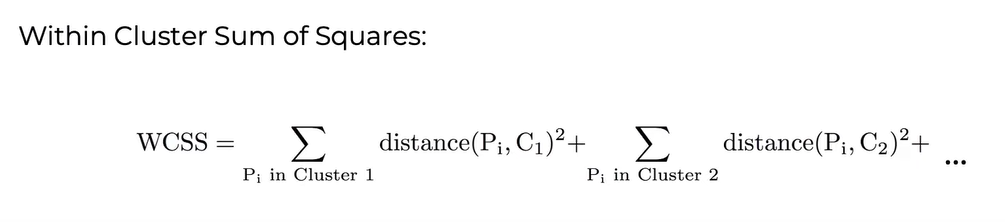

In [ ]:
#Now Implement Elbow Method To Identify Number of Clusters:
import sklearn.cluster as cluster
#Form an empty list to record loss values using wss as the metric
loss=[]
for i in range(1,13):
  kmeans = cluster.KMeans(n_clusters=i,init="k-means++")
  kmeans = kmeans.fit(df_sliced_yb)
  wss_iter=kmeans.inertia_
  loss.append(wss_iter)

<Axes: xlabel='Clusters', ylabel='WSS'>

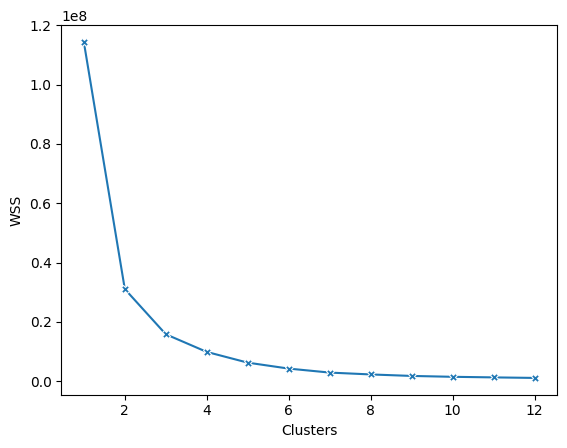

In [33]:
#Store the number of clusters and the loss scores in a dataframe for plotting
plotting = pd.DataFrame({'Clusters':range(1,13),'WSS':loss})
#Plot the graph
sns.lineplot(x='Clusters',y='WSS',data=plotting,marker="X")

**Hence, optimal number of clusters for Year_Birth and MntMeatProducts is 5.**

In [ ]:
#Perform K-Means Clustering and Visualization when K=5:
kmeans = cluster.KMeans(n_clusters=5,init="k-means++")
kmeans = kmeans.fit(df_sliced_yb)
df_sliced_yb['Clusters'] = kmeans.labels_

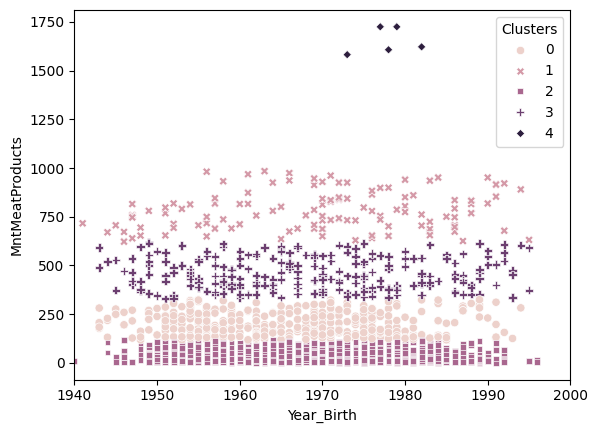

In [113]:
#Make a scatter plot:
sns.scatterplot(x="Year_Birth",y="MntMeatProducts",hue="Clusters",style='Clusters',data=df_sliced_yb)
plt.xlim(1940,2000)
plt.show()

***Conclusion: The normal distribution of age in relation to MntMeatProducts suggests that customers’ meat purchasing habits do not significantly vary by age group. Therefore, segmenting customers into age brackets may not yield more effective targeting. This insight directs us to consider other demographic or behavioral factors for segmentation strategies.***

**Now Check If There Is A Pattern For People With Income and The Amount Of Meat They Purchase**

In [78]:
#Find if our Column Income Contains any NA values
print(f"There are {df['Income'].isna().sum()} number of NA values")

There are 24 number of NA values


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: xlabel='Clusters', ylabel='WSS_Inc'>

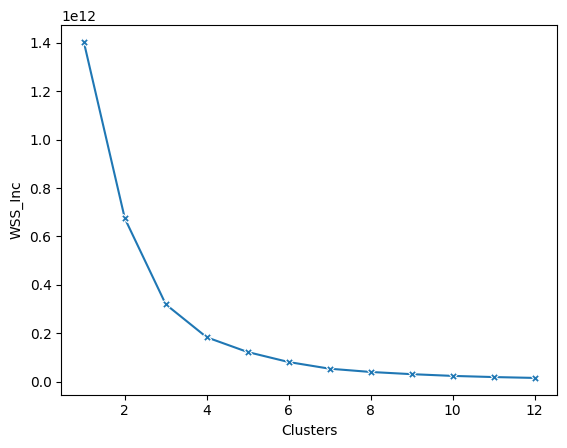

In [79]:
#Now Check Against Income
df_sliced_inc = df[['MntMeatProducts','Income']]
#Drop rows where Income is NA
df_sliced_inc_cl = df_sliced_inc.dropna()
#Now Implement Elbow Method To Identify Number of Clusters:
import sklearn.cluster as cluster
#Form an empty list to record loss values using wss as the metric
loss_inc=[]
for i in range(1,13):
  kmeans = cluster.KMeans(n_clusters=i,init="k-means++")
  kmeans = kmeans.fit(df_sliced_inc_cl)
  wss_iter=kmeans.inertia_
  loss_inc.append(wss_iter)
#Store the number of clusters and the loss scores in a dataframe for plotting
plotting_inc = pd.DataFrame({'Clusters':range(1,13),'WSS_Inc':loss_inc})
#Plot the graph
sns.lineplot(x='Clusters',y='WSS_Inc',data=plotting_inc,marker="X")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-82-93874e6e448c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced_inc_cl['Clusters'] = kmeans.labels_


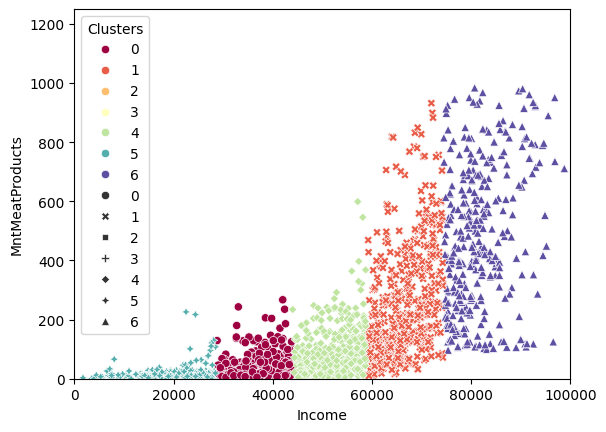

In [82]:
#Perform K-Means Clustering and Visualization when K=7:
kmeans = cluster.KMeans(n_clusters=7,init="k-means++")
kmeans = kmeans.fit(df_sliced_inc_cl)
df_sliced_inc_cl['Clusters'] = kmeans.labels_
#Make a scatter plot:
sns.scatterplot(x="Income",y="MntMeatProducts",hue="Clusters",style='Clusters',palette = "Spectral",data=df_sliced_inc_cl)
plt.xlim(0,100000)
plt.ylim(0,1250)
plt.show()

***Conclusion 2: Focusing on individuals with an annual income exceeding $65,000 could enhance conversion rates, as they tend to purchase meat in larger quantities compared to those earning below this threshold. The correlation between lower income and reduced meat consumption may be attributed to various factors, including limited disposable income. However, the dataset at hand does not provide sufficient details to accurately determine the disposable income levels of customers.***

# **Categorization of Customers Based On Their Marital Status**

In [128]:
df_marital = df[['MntMeatProducts','Marital_Status']]
df_marital.groupby('Marital_Status').sum('MntMeatProducts')

,MntMeatProducts
Marital_Status,
Absurd,625
Alone,79
Divorced,34848
Married,138829
Single,87412
Together,97500
Widow,14575
YOLO,100


from matplotlib import pyplot as plt
_df_0['MntMeatProducts'].plot(kind='hist', bins=20, title='MntMeatProducts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MntMeatProducts'].plot(kind='line', figsize=(8, 4), title='MntMeatProducts')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Cross Reference People Against the number of children and teen that they have at home vs the amount of meat they purchase.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: xlabel='Clusters', ylabel='WSS_Inc'>

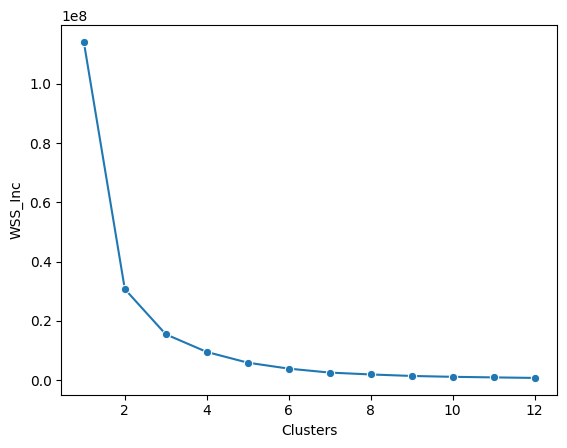

In [107]:
df_sliced_ch = df[['MntMeatProducts','Kidhome']]
#Now Implement Elbow Method To Identify Number of Clusters:
import sklearn.cluster as cluster
#Form an empty list to record loss values using wss as the metric
loss_ch=[]
for i in range(1,13):
  kmeans = cluster.KMeans(n_clusters=i,init="k-means++")
  kmeans = kmeans.fit(df_sliced_ch)
  wss_iter=kmeans.inertia_
  loss_ch.append(wss_iter)
#Store the number of clusters and the loss scores in a dataframe for plotting
plotting_ch = pd.DataFrame({'Clusters':range(1,13),'WSS_Inc':loss_ch})
#Plot the graph
sns.lineplot(x='Clusters',y='WSS_Inc',data=plotting_ch,marker="o")

Optimal Number of Clusters is 6

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-108-71af566e8817>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced_ch['Clusters'] = kmeans.labels_


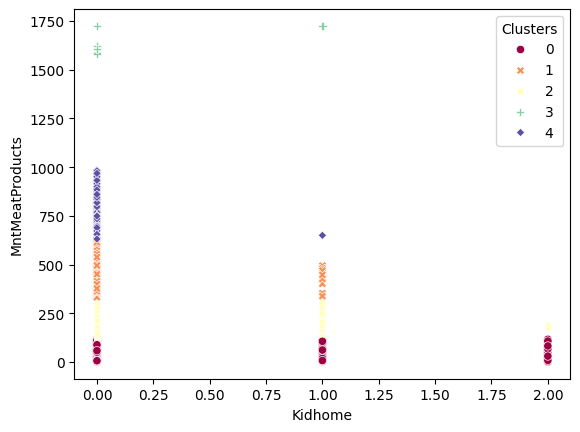

In [108]:
#Perform K-Means Clustering and Visualization when K=5:
kmeans = cluster.KMeans(n_clusters=5,init="k-means++")
kmeans = kmeans.fit(df_sliced_ch)
df_sliced_ch['Clusters'] = kmeans.labels_
#Make a scatter plot:
sns.scatterplot(x="Kidhome",y="MntMeatProducts",hue="Clusters",style='Clusters',palette = "Spectral",data=df_sliced_ch)
#plt.xlim(0,100000)
#plt.ylim(0,1250)
plt.show()

# **Teen**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: xlabel='Clusters', ylabel='WSS_Inc'>

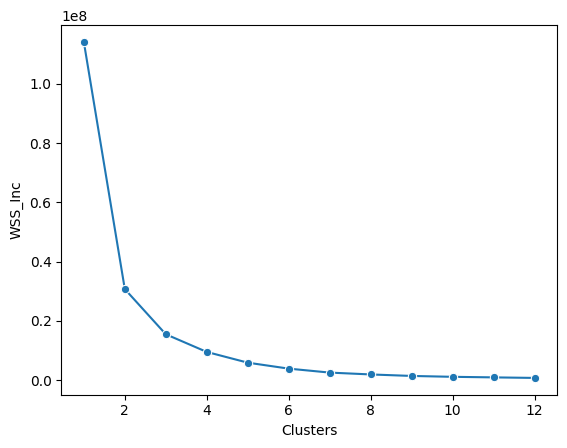

In [109]:
df_sliced_t = df[['MntMeatProducts','Teenhome']]
#Now Implement Elbow Method To Identify Number of Clusters:
import sklearn.cluster as cluster
#Form an empty list to record loss values using wss as the metric
loss_t=[]
for i in range(1,13):
  kmeans = cluster.KMeans(n_clusters=i,init="k-means++")
  kmeans = kmeans.fit(df_sliced_t)
  wss_iter=kmeans.inertia_
  loss_t.append(wss_iter)
#Store the number of clusters and the loss scores in a dataframe for plotting
plotting_t = pd.DataFrame({'Clusters':range(1,13),'WSS_Inc':loss_t})
#Plot the graph
sns.lineplot(x='Clusters',y='WSS_Inc',data=plotting_t,marker="o")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-111-5f24a92b2646>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced_t['Clusters'] = kmeans.labels_


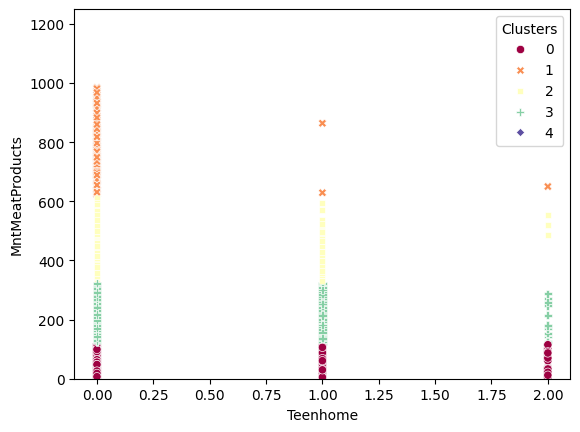

In [111]:
#Perform K-Means Clustering and Visualization when K=5:
kmeans = cluster.KMeans(n_clusters=5,init="k-means++")
kmeans = kmeans.fit(df_sliced_t)
df_sliced_t['Clusters'] = kmeans.labels_
#Make a scatter plot:
sns.scatterplot(x="Teenhome",y="MntMeatProducts",hue="Clusters",style='Clusters',palette = "Spectral",data=df_sliced_t)
#plt.xlim(0,100000)
plt.ylim(0,1250)
plt.show()

In [112]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

***Conclusion 3: Individuals with no children or teen often purchase more meat than those with children or teenagers at home. This trend may be influenced by various factors not covered in this project. Notably, one plausible explanation is the greater disposable income typically available to people with no children under their care. In contrast, families with children may have more financial constraints. Consequently, our marketing strategy will prioritize targeting demographics such as Widow, Together, Single, Married and Divorced with no children or Teen.***


# **Categorizing Customers as per their Purchasing Medium; Online or Offline**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: xlabel='Clusters', ylabel='WSS_Inc'>

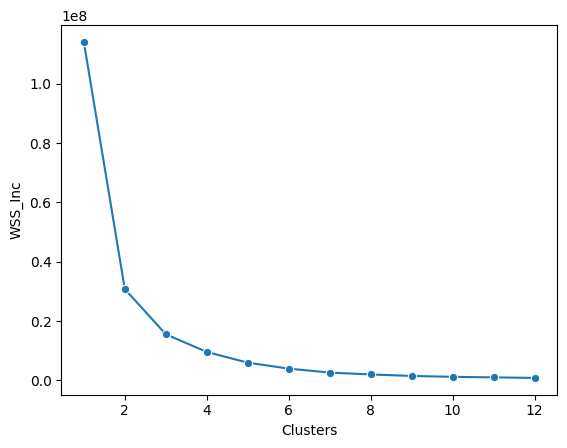

In [114]:
df_sliced_w = df[['MntMeatProducts','NumWebPurchases']]
#Now Implement Elbow Method To Identify Number of Clusters:
import sklearn.cluster as cluster
#Form an empty list to record loss values using wss as the metric
loss_w=[]
for i in range(1,13):
  kmeans = cluster.KMeans(n_clusters=i,init="k-means++")
  kmeans = kmeans.fit(df_sliced_w)
  wss_iter=kmeans.inertia_
  loss_w.append(wss_iter)
#Store the number of clusters and the loss scores in a dataframe for plotting
plotting_w = pd.DataFrame({'Clusters':range(1,13),'WSS_Inc':loss_w})
#Plot the graph
sns.lineplot(x='Clusters',y='WSS_Inc',data=plotting_w,marker="o")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-119-755b479edaf9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced_w['Clusters'] = kmeans.labels_


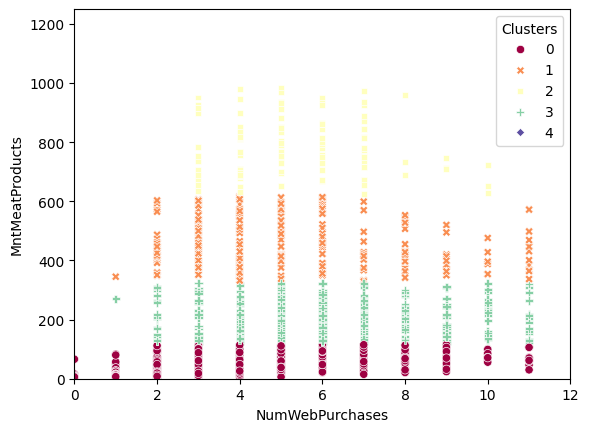

In [119]:
#Perform K-Means Clustering and Visualization when K=5:
kmeans = cluster.KMeans(n_clusters=5,init="k-means++")
kmeans = kmeans.fit(df_sliced_w)
df_sliced_w['Clusters'] = kmeans.labels_
#Make a scatter plot:
sns.scatterplot(x="NumWebPurchases",y="MntMeatProducts",hue="Clusters",style='Clusters',palette = "Spectral",data=df_sliced_w)
plt.xlim(0,12)
plt.ylim(0,1250)
plt.show()

***Conclusion: A distinct marketing strategy can be developed to target online customers who typically check out with 3 to 7 items in their baskets. To further refine the customer segment, a criterion can be established to include only those who have spent at least $600 on meat products previously. This approach ensures a focused and efficient marketing effort towards a high-value customer group.***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-123-d3d733d75726>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced_s['Clusters'] = kmeans.labels_


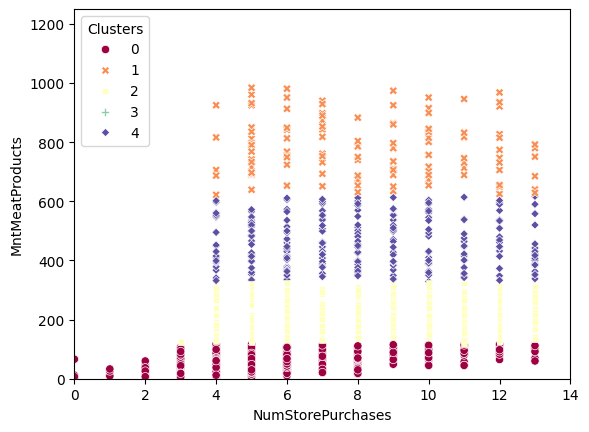

In [123]:
df_sliced_s = df[['NumStorePurchases','MntMeatProducts']]
kmeans = cluster.KMeans(n_clusters=5,init="k-means++")
kmeans = kmeans.fit(df_sliced_s)
df_sliced_s['Clusters'] = kmeans.labels_
#Make a scatter plot:
sns.scatterplot(x="NumStorePurchases",y="MntMeatProducts",hue="Clusters",style='Clusters',palette = "Spectral",data=df_sliced_s)
plt.xlim(0,14)
plt.ylim(0,1250)
plt.show()

***Conclusion: The data indicates that while onsite customers typically purchase similar quantities of meat, their shopping baskets are more diverse. This observation, albeit beyond our initial scope, presents an opportunity. By developing a targeted marketing strategy, we could encourage online customers to visit our physical store. This could potentially increase their overall spend, as they might be inclined to purchase additional items alongside meat.***

# **Final Profiling of Customers**

To pivot meat consumers to fish and engage our new supplier, we’ve identified key demographics:



1.   Focus on childless individuals, including married, cohabiting, widowed, or single persons.
2.   Target those with an annual income of at least $65,000.

Additionally, we’ve discovered strategies to boost profits:

1.   Develop a marketing plan for online shoppers who buy 3-7 items and have previously spent over $600 on meat, ensuring we target high-value customers.
2.   Encourage these customers to visit our stores, potentially increasing their spend due to a wider variety of products available in-store.